In [95]:
# Imports
import matplotlib.pyplot as plt   
import pandas as pd
import numpy as np


### Loading data

In [96]:
df = pd.read_csv('Pima Indians Diabetes Database.csv')

# Display the first few rows of the dataframe
print(df.head())
print(df.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

## Decide on features

In [97]:
X = df[['Age', 'BMI', 'BloodPressure']]
y = df['Outcome']

              Age         BMI  BloodPressure
count  768.000000  768.000000     768.000000
mean    33.240885   31.992578      69.105469
std     11.760232    7.884160      19.355807
min     21.000000    0.000000       0.000000
25%     24.000000   27.300000      62.000000
50%     29.000000   32.000000      72.000000
75%     41.000000   36.600000      80.000000
max     81.000000   67.100000     122.000000
Lower bounds for outliers:
 Age              -1.50
BMI              13.35
BloodPressure    35.00
dtype: float64
Upper bounds for outliers:
 Age               66.50
BMI               50.55
BloodPressure    107.00
dtype: float64


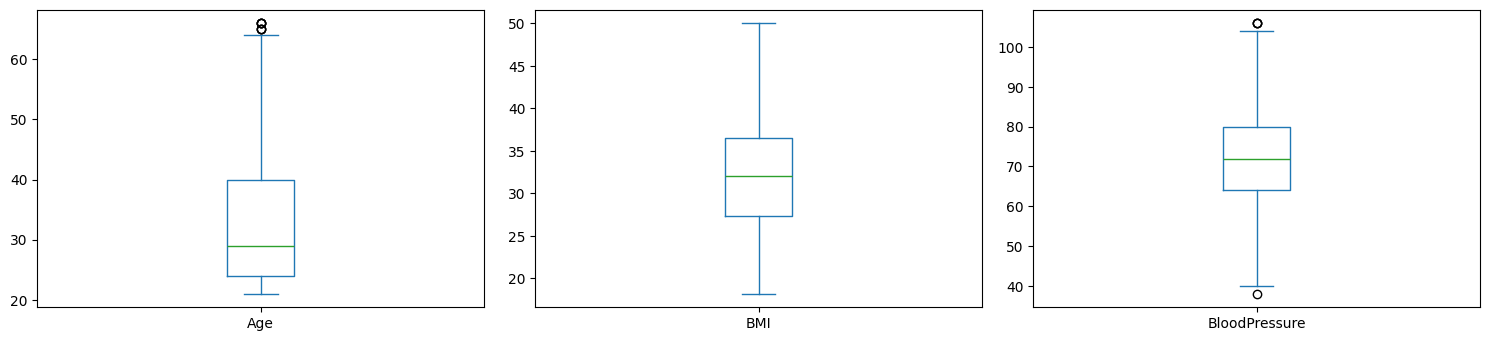

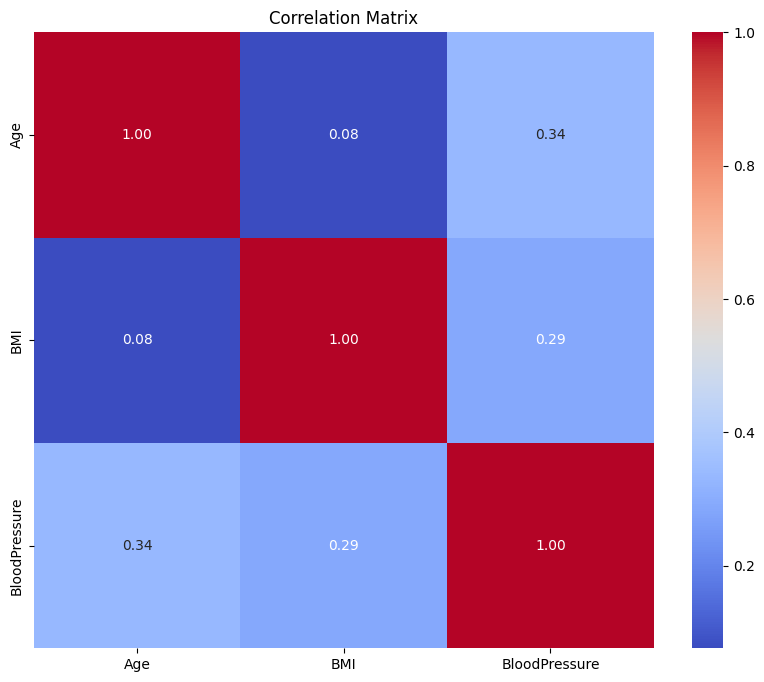

In [98]:
# print the quartile values for all numerical features 
print(X.describe())
# for each column, save the IQR, as well as the lower and upper bounds for outliers
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower bounds for outliers:\n", lower_bound)
print("Upper bounds for outliers:\n", upper_bound)
# remove all outliers from the dataframe based on these data
X = X[(X >= lower_bound) & (X <= upper_bound)]

# show box plots of all numerical features
X.plot(kind='box', subplots=True, layout=(3,3), figsize=(15,10))
plt.tight_layout()
plt.show()
import seaborn as sns   
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

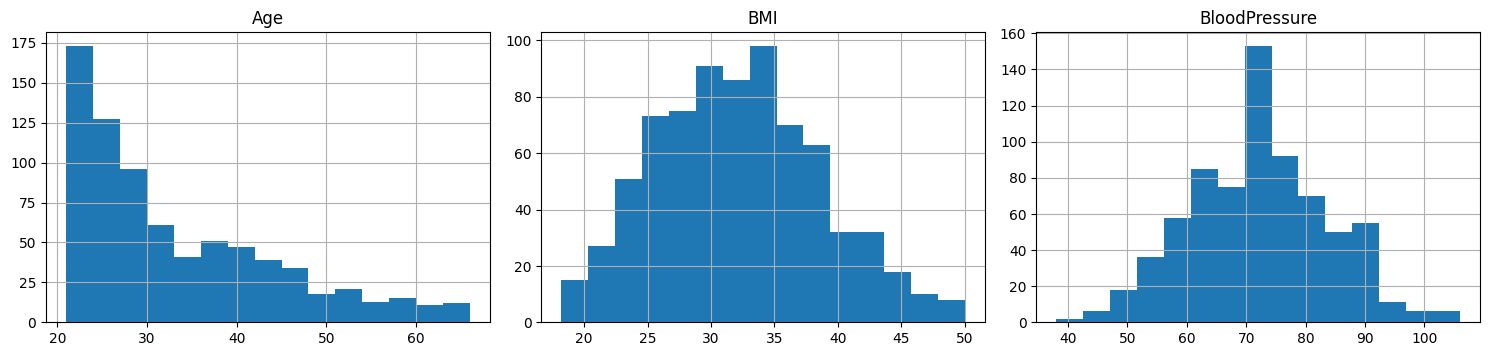

In [99]:
# print the histograms of all numerical features
X.hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.tight_layout()
plt.show()

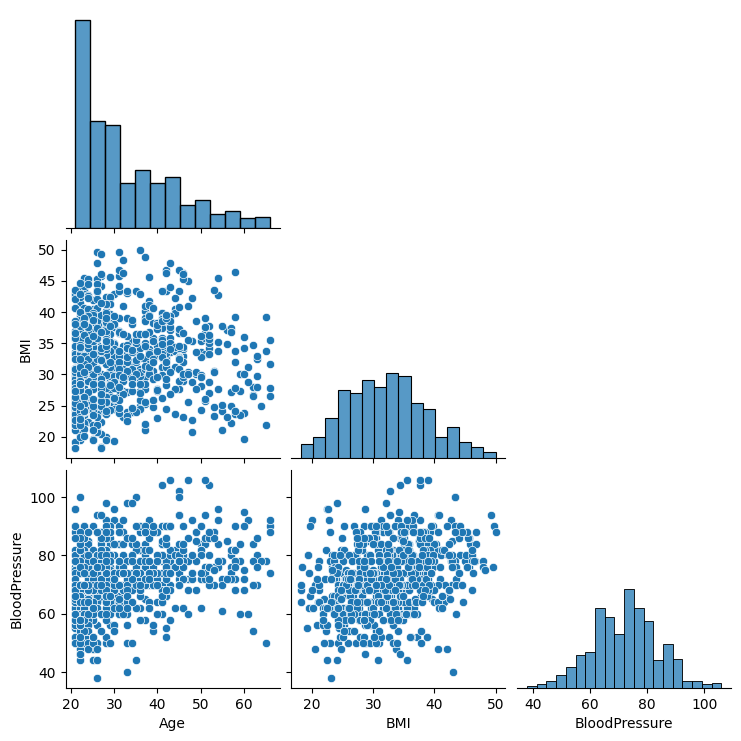

In [100]:



# do a paitplot of all numerical features
sns.pairplot(X,
             corner=True
             )
plt.show()

In [101]:

# show all examples with any missing values
print(df[df.isnull().any(axis=1)])


Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


## Feature selection

To invasive / can't be measured easily: Glucose, Insulin, Skin Thickness
DPF: Hard to determine, would also require to reveal family history
Number of pregnancies: Difficult, because only women affected, possibly a touchy subject

Leaves: 
Age: Is not discriminating, but just a fact
BMI: If self-reported, same
Blood pressure: Easy to measure and a regular accepted measure

# Feature Engineering

Age: Logarithminc is not the right approach here, as the imbalance is simply an underrepresentation of older people. A better approach may be upsampling as to not lose information, or even not do anything at all. 
BMI: No engineering required
Blood Pressure: same

## Because there are clear correlations between the remaining features, a PCA dimensionality reduction may make sense

Explained variance ratio: [0.4919046  0.31508355 0.19301185]


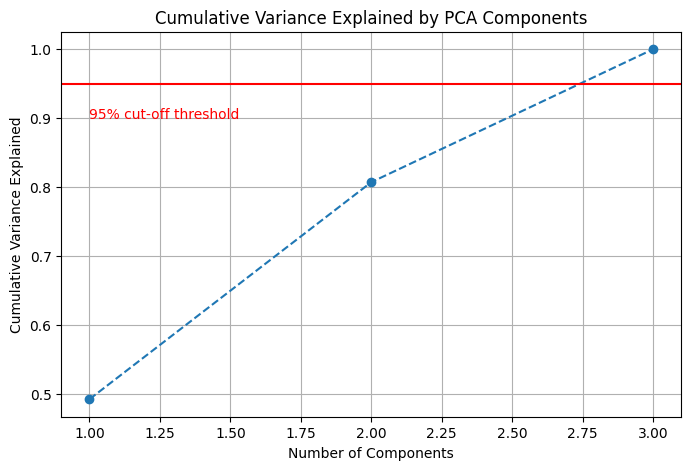

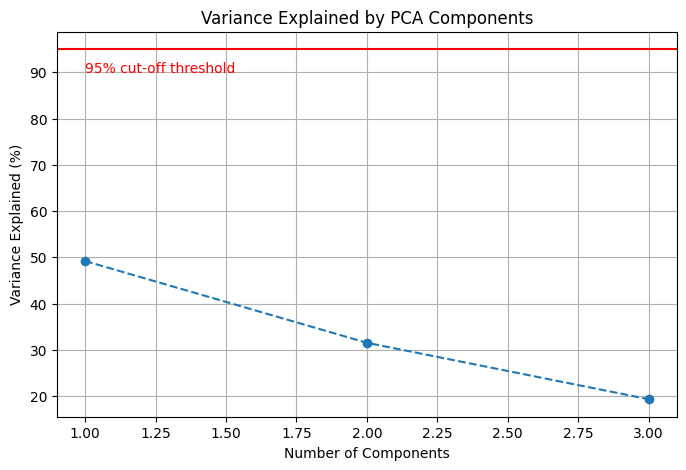

In [102]:
# do a PCA of scaled X and plot the feature contributions in % of variance explained
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler   
# drop rows with NaN values
X = X.dropna()
y = y[X.index] 
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_
# Print the explained variance ratio
print("Explained variance ratio:", explained_variance)
# Calculate cumulative variance
cumulative_variance = np.cumsum(explained_variance)
# Plot cumulative variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Variance Explained by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid()
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(1, 0.90, '95% cut-off threshold', color = 'red', fontsize=10)
plt.show()

# plot a cumulative variance chart with % variance explained
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance * 100, marker='o', linestyle='--')
plt.title('Variance Explained by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained (%)')
plt.grid()
plt.axhline(y=95, color='r', linestyle='-')
plt.text(1, 90, '95% cut-off threshold', color = 'red', fontsize=10)
plt.show()
